# Tiny ImageNet Classifier

In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from nimrod.image.datasets import ImageDataset, ImageDataModule
from nimrod.models.core import lr_finder, train_one_cycle
from hydra.utils import instantiate
from omegaconf import OmegaConf
import torch
from torchvision import transforms
from rich import print

## Data

In [3]:
project_name = 'Tiny-ImageNet-Classifier'

In [50]:
dm = ImageDataModule(
    "slegroux/tiny-imagenet-200-clean",
    data_dir = "../data/image",
    batch_size = 512,
    transforms = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.4822, 0.4494, 0.3978],
                std=[0.2754, 0.2679, 0.2811]
                )
        ]
    )
)


dm.prepare_data()
dm.setup()

print(f"""
    num_classes: {dm.num_classes}
    labels: {dm.label_names}
    img shape: {dm.train_ds[0][0].shape}
    img dim: {dm.dim}
"""
            
    )

[16:29:36] INFO - Init ImageDataModule for slegroux/tiny-imagenet-200-clean
[16:29:37] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[16:29:37] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[16:29:38] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
[16:29:38] INFO - Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2)
[16:29:38] INFO - Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux__

num_classes: 200
    labels: ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 
'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 
'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 
'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 
'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 
'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 
'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 
'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 
'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 
'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684', 'n02883205', 'n02892201', 
'n02906734', 'n02909870', 'n02917067', 'n02927161', 'n02948072', 'n02950826', 'n02963159', 'n02977058', 
'n02988304', 'n02999410', 'n03014705', 'n03026506', 'n03042490', 'n03085013', 'n03089624', 'n03100240', 
'n03126707', 'n03160309', 'n03179701', 'n03201208', 'n03250847', 'n03255030', 'n03355925', 'n03388043', 
'n03393912', 'n03400231', 'n03404251', 'n03424325', 'n03444034', 'n03447447', 'n03544143', 'n03584254', 
'n03599486', 'n03617480', 'n03637318', 'n03649909', 'n03662601', 'n03670208', 'n03706229', 'n03733131', 
'n03763968', 'n03770439', 'n03796401', 'n03804744', 'n03814639', 'n03837869', 'n03838899', 'n03854065', 
'n03891332', 'n03902125', 'n03930313', 'n03937543', 'n03970156', 'n03976657', 'n03977966', 'n03980874', 
'n03983396', 'n03992509', 'n04008634', 'n04023962', 'n04067472', 'n04070727', 'n04074963', 'n04099969', 
'n04118538', 'n04133789', 'n04146614', 'n04149813', 'n04179913', 'n04251144', 'n04254777', 'n04259630', 
'n04265275', 'n04275548', 'n04285008', 'n04311004', 'n04328186', 'n04356056', 'n04366367', 'n04371430', 
'n04376876', 'n04398044', 'n04399382', 'n04417672', 'n04456115', 'n04465501', 'n04486054', 'n04487081', 
'n04501370', 'n04507155', 'n04532106', 'n04532670', 'n04540053', 'n04560804', 'n04562935', 'n04596742', 
'n04597913', 'n06596364', 'n07579787', 'n07583066', 'n07614500', 'n07615774', 'n07695742', 'n07711569', 
'n07715103', 'n07720875', 'n07734744', 'n07747607', 'n07749582', 'n07753592', 'n07768694', 'n07871810', 
'n07873807', 'n07875152', 'n07920052', 'n09193705', 'n09246464', 'n09256479', 'n09332890', 'n09428293', 
'n12267677']
    img shape: torch.Size([3, 64, 64])
    img dim: [64, 64]

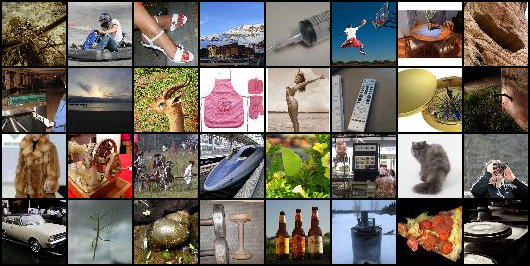

In [51]:
x_mean = torch.tensor([0.4822, 0.4494, 0.3978])
x_std =  torch.tensor([0.2754, 0.2679, 0.2811])

tfm_norm = transforms.Normalize(mean=x_mean, std=x_std)
tfm_denorm = transforms.Compose([transforms.Normalize(mean=[0.,0.,0.], std=1.0/x_std), transforms.Normalize(mean=-x_mean, std=[1,1,1])])

xb, yb = next(iter(dm.train_dataloader()))
dm.show_batch(tfm_denorm(xb[:32]))

## ConvNet

In [53]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/convnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 8, 16, 32, 64, 128]
# feats_dim = [3, 8, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 64, 32]
cfg_model.nnet.n_features = feats_dim
cfg_model.num_classes = dm.num_classes
model = instantiate(cfg_model) #partial

tags = [
    f"n_features:{feats_dim}",
    f"bs:{dm.batch_size}",
    f"epochs:{N_EPOCHS}",
    ]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger_cb=exp_logger
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[16:58:46] INFO - ConvNetX: init
[16:58:46] INFO - Classifier: init
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[16:58:48] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[16:58:48] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[16:58:49] INFO - Overwrite dataset info from restored data version i

NameError: name 'exit' is not defined

## ResNet

[16:59:16] INFO - ResNet: init
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:16] WARNING - setting conv bias back to False as Batchnorm is used
[16:59:

[16:59:17] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[16:59:17] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[16:59:18] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
[16:59:18] INFO - Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2)
[16:59:18] INFO - Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001778279410038923
Restoring states from the checkpoint path at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_068e4798-1060-41a8-a522-66786cf3a9d8.ckpt
Restored all states from the checkpoint at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_068e4798-1060-41a8-a522-66786cf3a9d8.ckpt


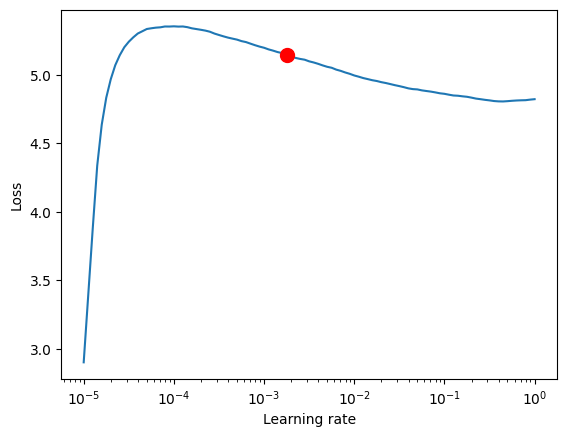

Suggested learning rate: 0.001778279410038923

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[16:59:40] INFO - ResNetX: init
[16:59:40] INFO - Classifier: init


====================================================================================================
Layer (type:depth-idx)                             Output Shape              Param #
====================================================================================================
ResNet                                             [512, 200]                --
├─Sequential: 1-1                                  [512, 200]                --
│    └─ResBlock: 2-1                               [512, 16, 64, 64]         --
│    │    └─Sequential: 3-1                        [512, 16, 64, 64]         2,800
│    │    └─Identity: 3-2                          [512, 3, 64, 64]          --
│    │    └─ConvBlock: 3-3                         [512, 16, 64, 64]         80
│    │    └─LeakyReLU: 3-4                         [512, 16, 64, 64]         --
│    └─ResBlock: 2-2                               [512, 32, 32, 32]         --
│    │    └─Sequential: 3-5                        [512, 32, 32, 32]         13,952
│    │    └─AvgPool2d: 3-6                         [512, 16, 32, 32]         --
│    │    └─ConvBlock: 3-7                         [512, 32, 32, 32]         576
│    │    └─LeakyReLU: 3-8                         [512, 32, 32, 32]         --
│    └─ResBlock: 2-3                               [512, 64, 16, 16]         --
│    │    └─Sequential: 3-9                        [512, 64, 16, 16]         55,552
│    │    └─AvgPool2d: 3-10                        [512, 32, 16, 16]         --
│    │    └─ConvBlock: 3-11                        [512, 64, 16, 16]         2,176
│    │    └─LeakyReLU: 3-12                        [512, 64, 16, 16]         --
│    └─ResBlock: 2-4                               [512, 128, 8, 8]          --
│    │    └─Sequential: 3-13                       [512, 128, 8, 8]          221,696
│    │    └─AvgPool2d: 3-14                        [512, 64, 8, 8]           --
│    │    └─ConvBlock: 3-15                        [512, 128, 8, 8]          8,448
│    │    └─LeakyReLU: 3-16                        [512, 128, 8, 8]          --
│    └─ResBlock: 2-5                               [512, 256, 4, 4]          --
│    │    └─Sequential: 3-17                       [512, 256, 4, 4]          885,760
│    │    └─AvgPool2d: 3-18                        [512, 128, 4, 4]          --
│    │    └─ConvBlock: 3-19                        [512, 256, 4, 4]          33,280
│    │    └─LeakyReLU: 3-20                        [512, 256, 4, 4]          --
│    └─ResBlock: 2-6                               [512, 512, 2, 2]          --
│    │    └─Sequential: 3-21                       [512, 512, 2, 2]          3,540,992
│    │    └─AvgPool2d: 3-22                        [512, 256, 2, 2]          --
│    │    └─ConvBlock: 3-23                        [512, 512, 2, 2]          132,096
│    │    └─LeakyReLU: 3-24                        [512, 512, 2, 2]          --
│    └─ResBlock: 2-7                               [512, 200, 1, 1]          --
│    │    └─Sequential: 3-25                       [512, 200, 1, 1]          1,282,400
│    │    └─AvgPool2d: 3-26                        [512, 512, 1, 1]          --
│    │    └─ConvBlock: 3-27                        [512, 200, 1, 1]          102,800
│    │    └─LeakyReLU: 3-28                        [512, 200, 1, 1]          --
│    └─Flatten: 2-8                                [512, 200]                --
====================================================================================================
Total params: 6,282,608
Trainable params: 6,282,608
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 81.79
====================================================================================================
Input size (MB): 25.17
Forward/backward pass size (MB): 4741.01
Params size (MB): 25.13
Estimated Total Size (MB): 4791.30
====================================================================================================

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[16:59:41] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[16:59:41] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ResNet             | 6.3 M  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.4243347644805908     │
│         test/loss         │    2.4629604816436768     │
└───────────────────────────┴───────────────────────────┘

[17:00:58] INFO - Best ckpt path: /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5/4-2.42.ckpt


epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▃▅▅▅▅▆▆▆▆▆▆▆▆▆███████
lr-AdamW,▁▂▂▂▃▄▄▅▆▇▇████▇▇▇▇▇▆▆▆▆▆▅▄▄▄▄▄▃▃▃▂▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▃▄▆█
train/acc_step,▁▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▄▄▅▅▅▅▅▅▆▆▅▆▆▆▇▇█████
train/loss_epoch,█▅▄▃▁
train/loss_step,█▇▆▆▆▅▅▅▅▅▄▄▄▃▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇███
val/acc,▁▃▆██
val/acc_best,▁▃▆██


(ResNetX(
   (nnet): ResNet(
     (layers): Sequential(
       (0): ResBlock(
         (activation): LeakyReLU(negative_slope=0.01)
         (conv_layer): Sequential(
           (0): ConvBlock(
             (net): Sequential(
               (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
               (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
               (2): LeakyReLU(negative_slope=0.01)
             )
           )
           (1): ConvBlock(
             (net): Sequential(
               (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
               (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
             )
           )
         )
         (id): ConvBlock(
           (net): Sequential(
             (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
             (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=T

In [54]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

# exp_logger = 'tensorboard'
exp_logger = 'wandb'
precision='16-mixed'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
cfg_model.num_classes=dm.num_classes
# feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
# feats_dim = [3, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 512]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial
extra_tag = "stride 1 first"

tags = [extra_tag, f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger_cb=exp_logger,
    precision=precision
    )

## Data augment

In [55]:
cfg = OmegaConf.load('../config/data/image/tiny_imagenet_aug.yaml')
dm = instantiate(cfg)
dm.prepare_data()
dm.setup()


[20:25:36] INFO - Init ImageDataModule for slegroux/tiny-imagenet-200-clean
[20:25:41] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[20:25:41] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[20:25:42] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
[20:25:42] INFO - Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2)
[20:25:42] INFO - Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux__

torch.Size([512, 3, 64, 64])
torch.Size([512])

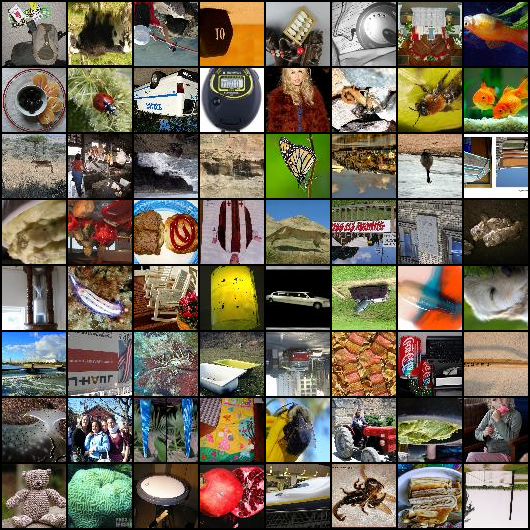

In [59]:
x_mean = torch.tensor([0.4822, 0.4494, 0.3978])
x_std =  torch.tensor([0.2754, 0.2679, 0.2811])

tfm_norm = transforms.Normalize(mean=x_mean, std=x_std)
tfm_denorm = transforms.Compose([transforms.Normalize(mean=[0.,0.,0.], std=1.0/x_std), transforms.Normalize(mean=-x_mean, std=[1,1,1])])


xb, yb = next(iter(dm.train_dataloader()))
print(xb.shape, yb.shape)

dm.show_batch(tfm_denorm(xb[:64]))

[20:31:28] INFO - ResNet: init
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:28] WARNING - setting conv bias back to False as Batchnorm is used
[20:31:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.001778279410038923
Restoring states from the checkpoint path at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_08250f9c-46d1-4d44-91dc-400e08b99fea.ckpt
Restored all states from the checkpoint at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_08250f9c-46d1-4d44-91dc-400e08b99fea.ckpt


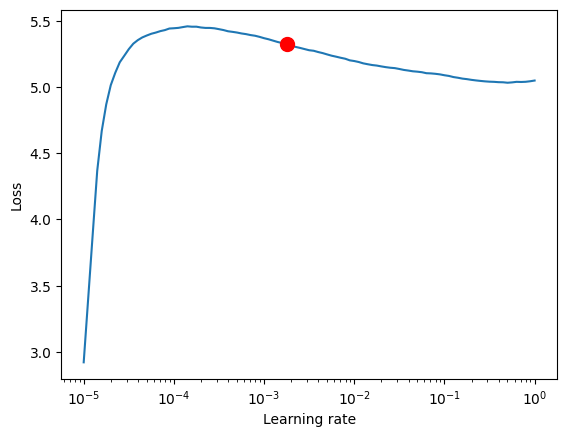

Suggested learning rate: 0.001778279410038923

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[20:31:59] INFO - ResNetX: init
[20:31:59] INFO - Classifier: init


====================================================================================================
Layer (type:depth-idx)                             Output Shape              Param #
====================================================================================================
ResNet                                             [512, 200]                --
├─Sequential: 1-1                                  [512, 200]                --
│    └─ResBlock: 2-1                               [512, 16, 64, 64]         --
│    │    └─Sequential: 3-1                        [512, 16, 64, 64]         2,800
│    │    └─Identity: 3-2                          [512, 3, 64, 64]          --
│    │    └─ConvBlock: 3-3                         [512, 16, 64, 64]         80
│    │    └─LeakyReLU: 3-4                         [512, 16, 64, 64]         --
│    └─ResBlock: 2-2                               [512, 32, 32, 32]         --
│    │    └─Sequential: 3-5                        [512, 32, 32, 32]         13,952
│    │    └─AvgPool2d: 3-6                         [512, 16, 32, 32]         --
│    │    └─ConvBlock: 3-7                         [512, 32, 32, 32]         576
│    │    └─LeakyReLU: 3-8                         [512, 32, 32, 32]         --
│    └─ResBlock: 2-3                               [512, 64, 16, 16]         --
│    │    └─Sequential: 3-9                        [512, 64, 16, 16]         55,552
│    │    └─AvgPool2d: 3-10                        [512, 32, 16, 16]         --
│    │    └─ConvBlock: 3-11                        [512, 64, 16, 16]         2,176
│    │    └─LeakyReLU: 3-12                        [512, 64, 16, 16]         --
│    └─ResBlock: 2-4                               [512, 128, 8, 8]          --
│    │    └─Sequential: 3-13                       [512, 128, 8, 8]          221,696
│    │    └─AvgPool2d: 3-14                        [512, 64, 8, 8]           --
│    │    └─ConvBlock: 3-15                        [512, 128, 8, 8]          8,448
│    │    └─LeakyReLU: 3-16                        [512, 128, 8, 8]          --
│    └─ResBlock: 2-5                               [512, 256, 4, 4]          --
│    │    └─Sequential: 3-17                       [512, 256, 4, 4]          885,760
│    │    └─AvgPool2d: 3-18                        [512, 128, 4, 4]          --
│    │    └─ConvBlock: 3-19                        [512, 256, 4, 4]          33,280
│    │    └─LeakyReLU: 3-20                        [512, 256, 4, 4]          --
│    └─ResBlock: 2-6                               [512, 128, 2, 2]          --
│    │    └─Sequential: 3-21                       [512, 128, 2, 2]          442,880
│    │    └─AvgPool2d: 3-22                        [512, 256, 2, 2]          --
│    │    └─ConvBlock: 3-23                        [512, 128, 2, 2]          33,024
│    │    └─LeakyReLU: 3-24                        [512, 128, 2, 2]          --
│    └─ResBlock: 2-7                               [512, 200, 1, 1]          --
│    │    └─Sequential: 3-25                       [512, 200, 1, 1]          591,200
│    │    └─AvgPool2d: 3-26                        [512, 128, 1, 1]          --
│    │    └─ConvBlock: 3-27                        [512, 200, 1, 1]          26,000
│    │    └─LeakyReLU: 3-28                        [512, 200, 1, 1]          --
│    └─Flatten: 2-8                                [512, 200]                --
====================================================================================================
Total params: 2,317,424
Trainable params: 2,317,424
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 68.35
====================================================================================================
Input size (MB): 25.17
Forward/backward pass size (MB): 4665.51
Params size (MB): 9.27
Estimated Total Size (MB): 4699.94
====================================================================================================

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[20:32:01] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[20:32:01] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ResNet             | 2.3 M  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.37050577998161316    │
│         test/loss         │    2.6788978576660156     │
└───────────────────────────┴───────────────────────────┘

[20:34:22] INFO - Best ckpt path: /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5/4-2.66.ckpt


epoch,▁▁▁▁▁▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆███████████
lr-AdamW,▂▂▂▃▄▇▇██████████▇▇▇▆▆▆▆▆▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▄▅▇█
train/acc_step,▁▁▁▁▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▅▆▇▆▆▆▇▆▇▇▇██▇▇██
train/loss_epoch,█▅▃▂▁
train/loss_step,█▇▇▇▆▅▅▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▃▃▃▂▂▂▂▁▂▂▂▂▁▁▂▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇██
val/acc,▁▃▅▇█
val/acc_best,▁▃▅▇█


In [61]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

# exp_logger = 'tensorboard'
exp_logger = 'wandb'
precision = '16-mixed'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
cfg_model.num_classes=dm.num_classes
# feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
# feats_dim = [3, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial
extra_tag = "stride 1 first"

tags = [
    'pre_activation block',
    precision,
    extra_tag,
    f"n_features:{feats_dim}",
    f"bs:{dm.batch_size}",
    f"epochs:{N_EPOCHS}"
    ]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 3e-4

# ONE-CYCLE TRAINING
trained_model, best_ckpt = train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger_cb=exp_logger,
    precision=precision
    )